In [1]:
import tensorflow as tf
from tensorflow import keras

#load MNIST Dataset
mnist = keras.datasets.mnist 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 19s 2us/step


In [2]:
X_train, X_test = X_train / 255.0, X_test / 255.0 #Normalize data

In [3]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #Flatten the input
    keras.layers.Dense(128, activation='relu'), #Hidden layer with 128 neurons
    keras.layers.Dense(10, activation='softmax') #Output layer with 10 neurons for 10 classes
])

c:\Users\adity\miniconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) #Compile the model with Adam optimizer and sparse categorical crossentropy loss

#model training
model.fit(X_train, y_train, epochs=5) #Train the model for 5 epochs

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8732 - loss: 0.4421
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9647 - loss: 0.1213
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9771 - loss: 0.0794
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9833 - loss: 0.0552
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9869 - loss: 0.0425


In [5]:
#model evaluation
test_losee, test_acc = model.evaluate(X_test, y_test) #Evaluate the model on test data
print('Test accuracy:', test_acc) #Print the test accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9694 - loss: 0.1032
Test accuracy: 0.9728000164031982


In [6]:
import numpy as np
import matplotlib.pyplot as plt

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Predicted digit: 1


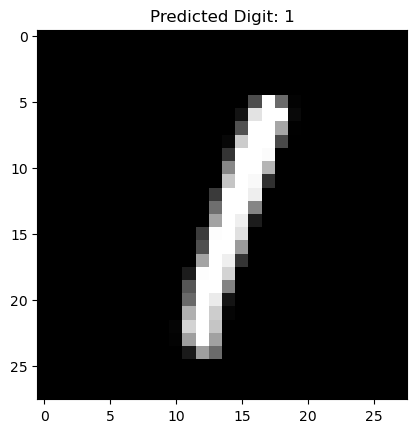

In [9]:
#Random image selection
image_index = 5
test_image = X_test[image_index]


#model prediction
pred = model.predict(test_image.reshape(1, 28, 28))

#predicted digit
predicted_digit = np.argmax(pred) #Get the index of the highest probability
print(f'Predicted digit: {predicted_digit}')

#Image showing
plt.imshow(test_image, cmap='gray')
plt.title(f'Predicted Digit: {predicted_digit}')
plt.show()

# CNN (Convulational Neural Network)

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

#Reshaping for CNN input 
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')/255
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')/255

In [3]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

c:\Users\adity\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) #Compile the model with Adam optimizer and sparse categorical crossentropy loss

#model training
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 40ms/step - accuracy: 0.9004 - loss: 0.3281
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 40ms/step - accuracy: 0.9847 - loss: 0.0517
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 87s 46ms/step - accuracy: 0.9897 - loss: 0.0345
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 40ms/step - accuracy: 0.9928 - loss: 0.0243
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.9944 - loss: 0.0171


In [5]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy: ', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9871 - loss: 0.0350
Test accuracy:  0.989300012588501
